In [10]:
import pandas as pd
import requests
import json

# Function to get ACS data for a specific year
def get_acs_data(year):
    # ACS 1-year estimates are available from 2005 onwards
    if year < 2005:
        return None
    
    # API URL for ACS data
    url = f"https://api.census.gov/data/{year}/acs/acs1"
    
    # Parameters for the API request
    params = {
        "get": "B25119_001E",  # Median household income for occupied housing units
        "for": "state:06",  # California FIPS code
        "key": ""  # Replace with your Census API key
    }
    
    try:
        print(url)
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an exception for bad status codes
        
        data = response.json()
        if len(data) > 1 and len(data[1]) > 0:
            return int(data[1][0])  # Return the median income
        else:
            print(f"Unexpected data format for year {year}: {data}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for year {year}: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON for year {year}: {e}")
        print(f"Response content: {response.content}")
        return None
    except Exception as e:
        print(f"Unexpected error for year {year}: {e}")
        return None

# Create a list of years from 2005 to 2022 (or the most recent available year)
years = list(range(2005, 2023))

# Get data for each year
data = []
for year in years:
    print(f"Fetching data for year {year}...")
    income = get_acs_data(year)
    if income is not None:
        data.append({"Year": year, "Median Income": income})
    else:
        print(f"Failed to fetch data for year {year}")

# Create the dataframe
df = pd.DataFrame(data)

# Display the dataframe
print(df)

# Save to CSV
df.to_csv("california_single_family_income.csv", index=False)

Fetching data for year 2005...
https://api.census.gov/data/2005/acs/acs1
Error fetching data for year 2005: Expecting value: line 2 column 1 (char 1)
Failed to fetch data for year 2005
Fetching data for year 2006...
https://api.census.gov/data/2006/acs/acs1
Error fetching data for year 2006: Expecting value: line 2 column 1 (char 1)
Failed to fetch data for year 2006
Fetching data for year 2007...
https://api.census.gov/data/2007/acs/acs1
Error fetching data for year 2007: Expecting value: line 2 column 1 (char 1)
Failed to fetch data for year 2007
Fetching data for year 2008...
https://api.census.gov/data/2008/acs/acs1
Error fetching data for year 2008: Expecting value: line 2 column 1 (char 1)
Failed to fetch data for year 2008
Fetching data for year 2009...
https://api.census.gov/data/2009/acs/acs1
Error fetching data for year 2009: Expecting value: line 2 column 1 (char 1)
Failed to fetch data for year 2009
Fetching data for year 2010...
https://api.census.gov/data/2010/acs/acs1
Er

In [5]:
df.head()

""


ValueError: Could not interpret value `Median Income` for `x`. An entry with this name does not appear in `data`.

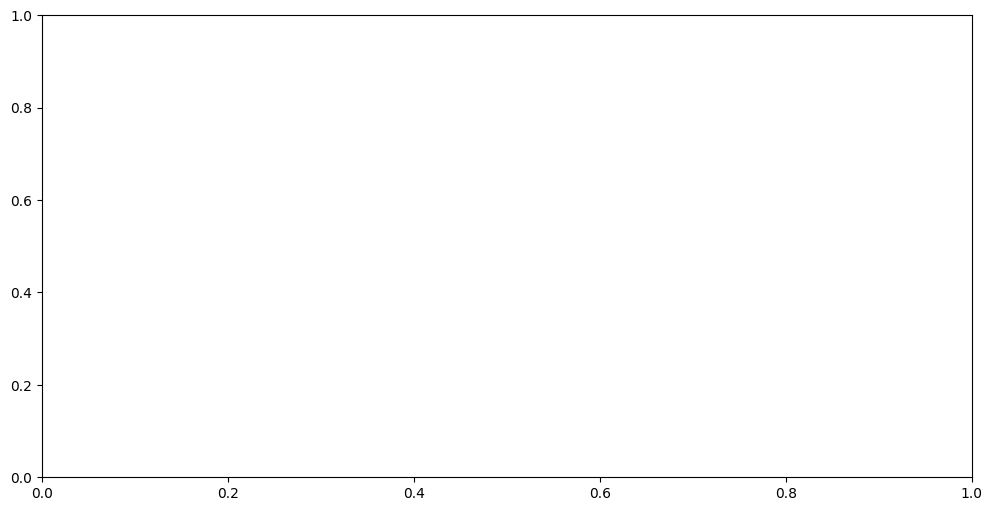

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create the histogram
sns.histplot(data=df, x='Median Income', bins=15, kde=True, ax=ax)

# Customize the plot
ax.set_title('Distribution of Median Income in California (2005-2022)', fontsize=16)
ax.set_xlabel('Median Income ($)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Format x-axis labels to show thousands
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add a vertical line for the mean income
mean_income = df['Median Income'].mean()
ax.axvline(mean_income, color='red', linestyle='dashed', linewidth=2)
ax.text(mean_income*1.02, ax.get_ylim()[1]*0.9, f'Mean: ${mean_income:,.0f}', 
        color='red', fontweight='bold')

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()